<a href="https://colab.research.google.com/github/gururajkulkarni40/Monkey-Breed-Classification/blob/main/Monkey_Breed_Classification_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf  #tf >2.0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.5.0'

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                    zoom_range=0.2,
                                  vertical_flip=True,
                                  horizontal_flip=True)

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/MACHINE LEARNING PROJECTS/Monkey-Breed-Classification-using-Deep-Learning/Monkey Breed Classification using Deep Learning/training',
                                                 target_size=(224,224),class_mode='categorical',batch_size=16
                                         )

Found 430 images belonging to 1 classes.


In [8]:
test_datagen= ImageDataGenerator(rescale=1./255)

test_set= test_datagen.flow_from_directory('/content/drive/MyDrive/MACHINE LEARNING PROJECTS/Monkey-Breed-Classification-using-Deep-Learning/Monkey Breed Classification using Deep Learning/validation',
                                          target_size=(224,224),class_mode='categorical',batch_size=16)

Found 272 images belonging to 1 classes.


Lets make CNN

In [9]:
#Initalising the CNN
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Lets Train CNN

In [11]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
27/27 [==============================] - 348s 12s/step - loss: 7381.3545 - accuracy: 0.5419 - val_loss: 35553.7188 - val_accuracy: 0.0000e+00
Epoch 2/10
27/27 [==============================] - 15s 579ms/step - loss: 200561.6562 - accuracy: 0.2047 - val_loss: 490703.3125 - val_accuracy: 0.0000e+00
Epoch 3/10
27/27 [==============================] - 16s 581ms/step - loss: 1198023.8750 - accuracy: 0.1977 - val_loss: 2102074.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
27/27 [==============================] - 15s 581ms/step - loss: 3726443.5000 - accuracy: 0.0744 - val_loss: 5454067.0000 - val_accuracy: 1.0000
Epoch 5/10
27/27 [==============================] - 15s 577ms/step - loss: 8243700.5000 - accuracy: 0.1721 - val_loss: 10581449.0000 - val_accuracy: 1.0000
Epoch 6/10
27/27 [==============================] - 15s 580ms/step - loss: 13248626.0000 - accuracy: 0.1512 - val_loss: 13794376.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
27/27 [==============================] - 16s 585

In [12]:
history.model.save('/content/drive/MyDrive/MACHINE LEARNING PROJECTS/Monkey-Breed-Classification-using-Deep-Learning/Monkey Breed Classification using Deep Learning/models/model-10.h5')

In [13]:
model=tf.keras.models.load_model('/content/drive/MyDrive/MACHINE LEARNING PROJECTS/Monkey-Breed-Classification-using-Deep-Learning/Monkey Breed Classification using Deep Learning/models/model-10.h5')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

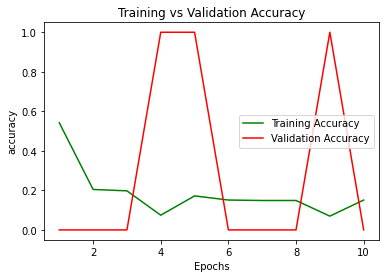

In [15]:
import matplotlib.pyplot as plt
acc_train=history.history['accuracy']
acc_val=history.history['val_accuracy']
epochs=range(1,11)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'r',label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

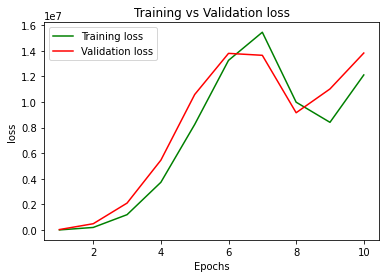

In [16]:
import matplotlib.pyplot as plt
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(1,11)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'r',label='Validation loss')
plt.title("Training vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Testing

In [17]:


import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing import image



In [18]:


txt=pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING PROJECTS/Monkey-Breed-Classification-using-Deep-Learning/Monkey Breed Classification using Deep Learning/models/monkey_labels.txt')



In [19]:
txt

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


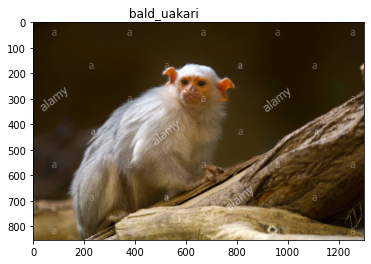

In [23]:
test_image='/content/drive/MyDrive/MACHINE LEARNING PROJECTS/Monkey-Breed-Classification-using-Deep-Learning/Monkey Breed Classification using Deep Learning/training/training/n6/n6016.jpg'
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
result=np.argmax(result)
Name=txt.iloc[result]
Name=Name.iloc[2]
plt.imshow(open_image)
plt.title(Name)
plt.show()